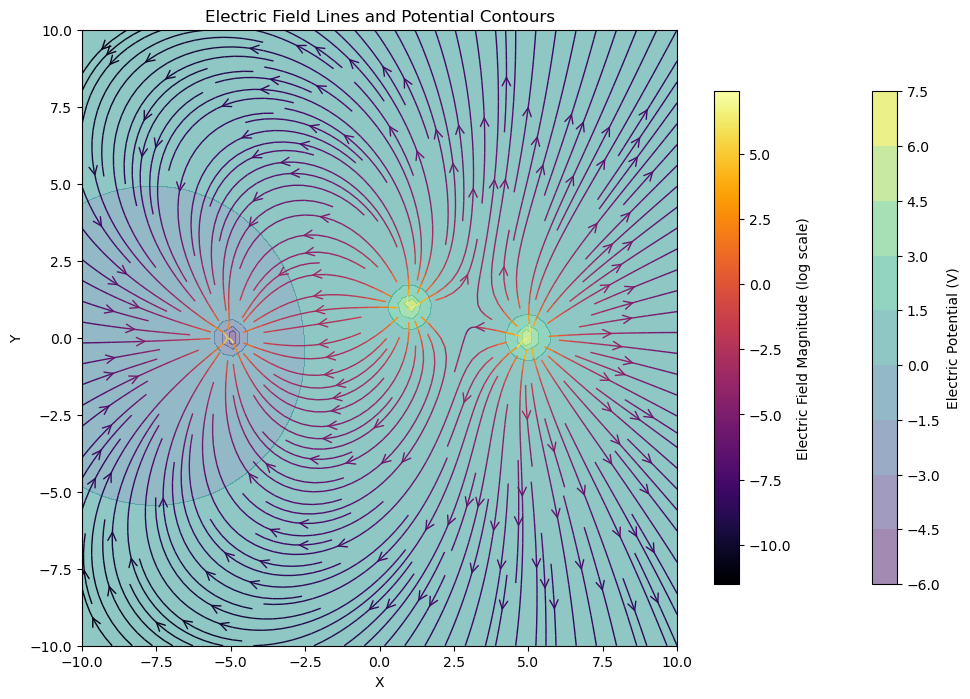

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field(q, r0, x, y):
    """Calculate the electric field vector E at (x, y) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

def potential(q, r0, x, y):
    """Calculate the electric potential phi at (x, y) due to charge q at r0."""
    return q / np.hypot(x-r0[0], y-r0[1])

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


# Create a list of charges and their positions
charges = [(1, (5, 0)), (-1, (-5, 0)),(1,(1,1))]

# Electric field vector, E(x, y), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Phi = np.zeros((ny, nx))

for charge in charges:
    ex, ey = electric_field(charge[0], charge[1], X, Y)
    Ex += ex
    Ey += ey
    Phi += potential(charge[0], charge[1], X, Y)

# Plot the streamlines with an appropriate colormap and arrow style
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

color = 2 * np.log(np.hypot(Ex, Ey))  # Color by electric field magnitude
stream = ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
                       density=2, arrowstyle='->', arrowsize=1.5)

# Add filled contours for the electric potential
contour = ax.contourf(X, Y, Phi, alpha=0.5, cmap=plt.cm.viridis)
fig.colorbar(contour, ax=ax, shrink=0.8, label='Electric Potential (V)')
fig.colorbar(stream.lines, ax=ax, shrink=0.8, label='Electric Field Magnitude (log scale)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title('Electric Field Lines and Potential Contours')
plt.show()